# Titanic Project 

#### This assignment is designed to predict which patients on the Titanic survived from the incident. 

First I do some (probably too extensive) EDA and then I create two models to see which is best

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from importlib import reload

import regression

In [2]:
data = pd.read_csv("data.csv")

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
#Looking at data

#data

#data.head()

# print(data.count())
# print('\n')
# print(data.isnull().sum())

In [5]:
print('This is for all of the data, before it was split up')
print('  -{:.4}% of the Age data is missing'.format((data['Age'].isnull().sum()/data.shape[0])*100))
print("     -This is an important input so we'll find a way to fill in the missing values")
print('  -{:.1}% of the Fare data is missing'.format((data['Fare'].isnull().sum()/data.shape[0])*100))
print("     -Should be easy to fill in missing values")
print('  -{:.4}% of the Cabin data is missing'.format((data['Cabin'].isnull().sum()/data.shape[0])*100))
print("     -We'll just skip this data since there's so much missing")
print('  -{:.2}% of the Embarked data is missing'.format((data['Embarked'].isnull().sum()/data.shape[0])*100))
print("     -Should be easy to fill in missing values")

This is for all of the data, before it was split up
  -20.09% of the Age data is missing
     -This is an important input so we'll find a way to fill in the missing values
  -0.08% of the Fare data is missing
     -Should be easy to fill in missing values
  -77.46% of the Cabin data is missing
     -We'll just skip this data since there's so much missing
  -0.15% of the Embarked data is missing
     -Should be easy to fill in missing values


In [6]:
#Split up the data now so that we can fill in the missing data separately
#Otherwise our training data will leak into the test data and affect our outcome
#Splitting data into training data (this will be training data and verification data) and test data
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

#Splitting data matrix into two separate: one for test and the rest for training (which will be split into train and validate)
#10% of all of our data will be used to test the training
#15% of what's left will be used to validate the training
#We'll use the 90% of the original dataset (train and validate) as our final training set to then test the test set
data_training, data_test = train_test_split(data, test_size = 0.10)
data_train, data_validate = train_test_split(data_training, test_size = 0.15)

# #Training data = data_train
# #Validation data = data_validate
# #Test data = data_test

#Double Check that nothing is missing
print('Training Set is {} long, Train Set is {} long, Validation Set is {} long, and Test Set is {} long'.format(len(data_training), len(data_train), len(data_validate), len(data_test)))
print('All data should equal {}, equals {}'.format(len(data), len(data_train) + len(data_validate) + len(data_test)))

Training Set is 1178 long, Train Set is 1001 long, Validation Set is 177 long, and Test Set is 131 long
All data should equal 1309, equals 1309


In [7]:
#Use the data_training to look at the training data as a whole ==> plots
#While using data_train, data_validate to look at each part, making sure that the validation looks similar to the train

In [8]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
987,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
1108,1109,0,1,"Wick, Mr. George Dennick",male,57.0,1,1,36928,164.8667,NaN,S
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
219,220,0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
956,957,1,2,"Corey, Mrs. Percy C (Mary Phyllis Elizabeth Mi...",female,NaN,0,0,F.C.C. 13534,21.0000,NaN,S
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
807,808,0,3,"Pettersson, Miss. Ellen Natalia",female,18.0,0,0,347087,7.7750,NaN,S


## EDA 

/Users/melendez526/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/melendez526/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


[]

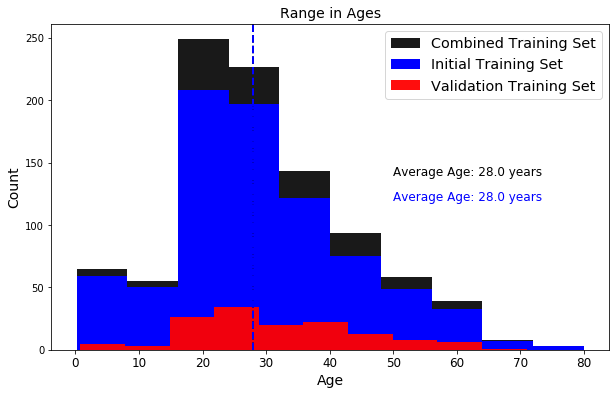

In [9]:
median_age_training = data_training['Age'].median(skipna = True)
median_age_train = data_train['Age'].median(skipna = True)

plt.figure(figsize=(10,6))
plt.hist(data_training['Age'], color = 'k', alpha = 0.9, label = 'Combined Training Set')
plt.hist(data_train['Age'], color = 'b', label = 'Initial Training Set')
plt.hist(data_validate['Age'], color = 'r', alpha = 0.95, label = 'Validation Training Set')
plt.axvline(median_age_training, color = 'k', linestyle = 'dashed', linewidth = 2)
plt.axvline(median_age_train, color = 'b', linestyle = 'dashed', linewidth = 2)
plt.text(50, 140, 'Average Age: {:.3} years'.format(median_age_training), color = 'k', fontsize = 12)
plt.text(50, 120, 'Average Age: {:.3} years'.format(median_age_train), color = 'b', fontsize = 12)
plt.legend(fontsize = 'x-large')
plt.xlabel('Age', size = 14)
plt.ylabel('Count', size = 14)
plt.title('Range in Ages', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 10)
plt.savefig('Train_Age_Ranges.pdf')
plt.plot()

/Users/melendez526/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/melendez526/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


[]

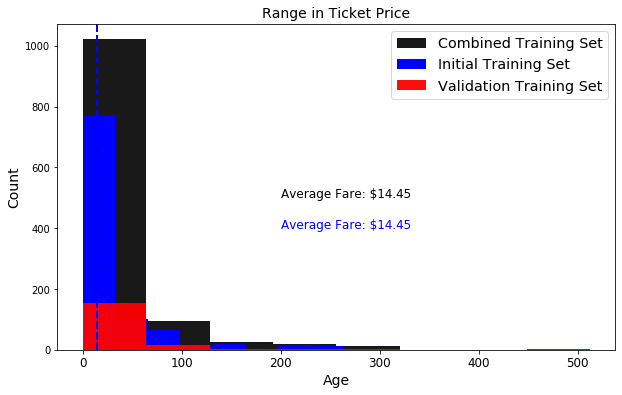

In [10]:
median_fare_training = data_training['Fare'].median(skipna = True)
median_fare_train = data_train['Fare'].median(skipna = True)

plt.figure(figsize=(10,6))
plt.hist(data_training['Fare'], color = 'k', alpha = 0.9, label = 'Combined Training Set', bins = 8)
plt.hist(data_train['Fare'], color = 'b', label = 'Initial Training Set', bins = 8)
plt.hist(data_validate['Fare'], color = 'r', alpha = 0.95, label = 'Validation Training Set', bins = 8)
plt.axvline(median_fare_training, color = 'k', linestyle = 'dashed', linewidth = 2)
plt.axvline(median_fare_train, color = 'b', linestyle = 'dashed', linewidth = 2)
plt.text(200, 500, 'Average Fare: ${:.4}'.format(median_fare_training), color = 'k', fontsize = 12)
plt.text(200, 400, 'Average Fare: ${:.4}'.format(median_fare_train), color = 'b', fontsize = 12)
plt.legend(fontsize = 'x-large')
plt.xlabel('Age', size = 14)
plt.ylabel('Count', size = 14)
plt.title('Range in Ticket Price', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 10)
plt.savefig('Train_Fare_Ranges.pdf')
plt.plot()

[]

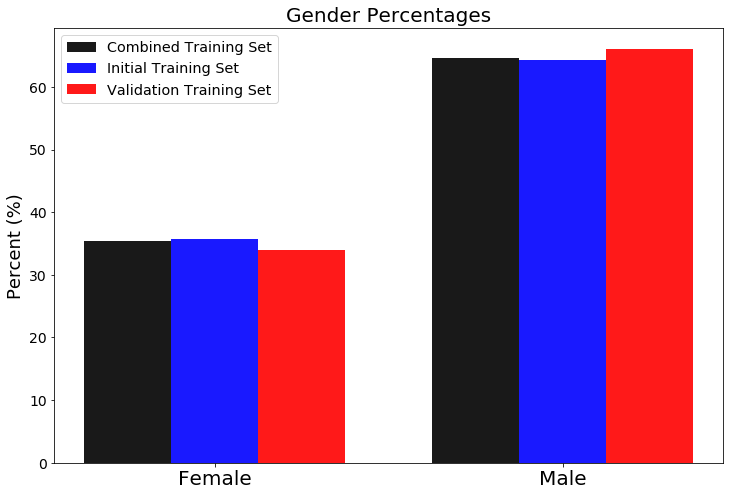

In [11]:
graph_1x = ('Female', 'Male')
width = 0.25
ind = np.arange(2)
graph_y_training = ((sum(data_training['Sex'] == 'female') / len(data_training))*100, (sum(data_training['Sex'] == 'male') / len(data_training))*100)
graph_y_train = ((sum(data_train['Sex'] == 'female') / len(data_train))*100, (sum(data_train['Sex'] == 'male') / len(data_train))*100)
graph_y_validate = ((sum(data_validate['Sex'] == 'female') / len(data_validate))*100, (sum(data_validate['Sex'] == 'male') / len(data_validate))*100)
plt.figure(figsize=(12,8))
plt.bar(ind, graph_y_training, width, color = 'k', alpha = 0.9, label = 'Combined Training Set')
plt.bar(ind + width, graph_y_train, width, color = 'b', alpha = 0.9, label = 'Initial Training Set')
plt.bar(ind + 2* width, graph_y_validate, width, color = 'r', alpha = 0.9, label = 'Validation Training Set')
plt.xticks(ind + width, ('Female', 'Male'))
plt.xticks(size = 20)
plt.yticks(size = 14)
plt.ylabel('Percent (%)', size = 18)
plt.title('Gender Percentages', size = 20)
plt.legend(fontsize = 'x-large')
plt.savefig('Train_Gender_Percentage_Comparison.pdf')
plt.plot()

[]

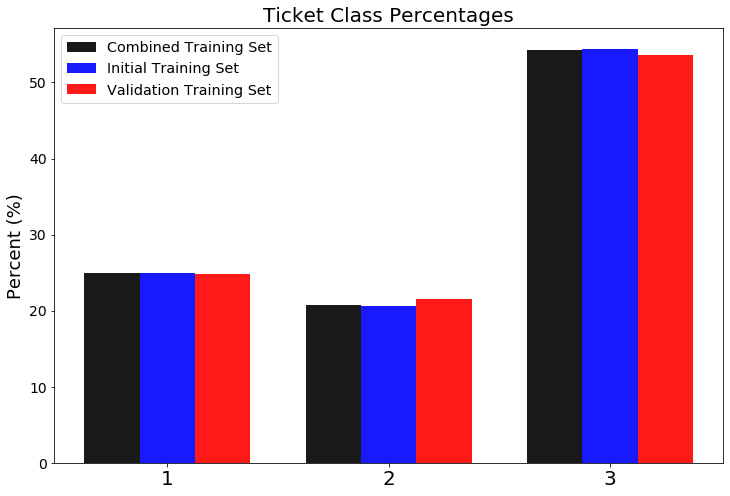

In [12]:
graph_1x = ('1', '2', '3')
width = 0.25
ind = np.arange(3)
graph_y_training = ((sum(data_training['Pclass'] == 1) / len(data_training))*100, (sum(data_training['Pclass'] == 2) / len(data_training))*100, (sum(data_training['Pclass'] == 3) / len(data_training))*100)
graph_y_train = ((sum(data_train['Pclass'] == 1) / len(data_train))*100, (sum(data_train['Pclass'] == 2) / len(data_train))*100, (sum(data_train['Pclass'] == 3) / len(data_train))*100)
graph_y_validate = ((sum(data_validate['Pclass'] == 1) / len(data_validate))*100, (sum(data_validate['Pclass'] == 2) / len(data_validate))*100, (sum(data_validate['Pclass'] == 3) / len(data_validate))*100)
plt.figure(figsize=(12,8))
plt.bar(ind, graph_y_training, width, color = 'k', alpha = 0.9, label = 'Combined Training Set')
plt.bar(ind + width, graph_y_train, width, color = 'b', alpha = 0.9, label = 'Initial Training Set')
plt.bar(ind + 2*width, graph_y_validate, width, color = 'r', alpha = 0.9, label = 'Validation Training Set')
plt.xticks(ind + width, ('1', '2', '3'))
plt.xticks(size = 20)
plt.yticks(size = 14)
plt.ylabel('Percent (%)', size = 18)
plt.title('Ticket Class Percentages', size = 20)
plt.legend(fontsize = 'x-large')
plt.savefig('Train_Class_Percentage_Comparison.pdf')
plt.plot()

[]

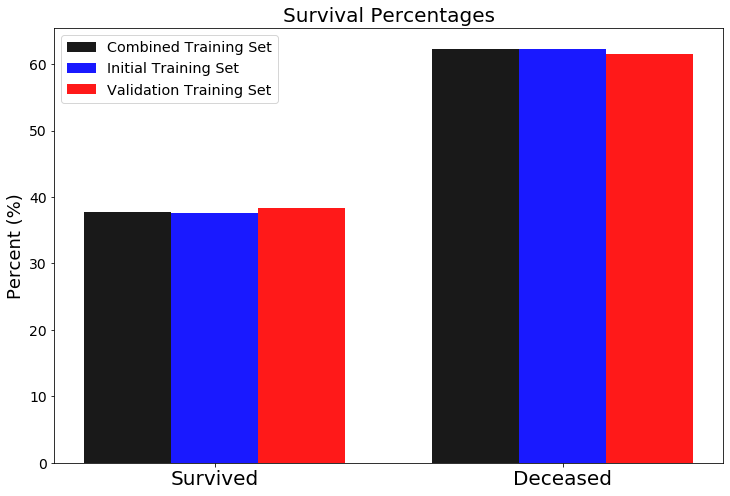

In [13]:
graph_1x = ('Survived', 'Deceased')
width = 0.25
ind = np.arange(2)
graph_y_training = ((sum(data_training['Survived'] == 1) / len(data_training))*100, (sum(data_training['Survived'] == 0) / len(data_training))*100)
graph_y_train = ((sum(data_train['Survived'] == 1) / len(data_train))*100, (sum(data_train['Survived'] == 0) / len(data_train))*100)
graph_y_validate = ((sum(data_validate['Survived'] == 1) / len(data_validate))*100, (sum(data_validate['Survived'] == 0) / len(data_validate))*100)
plt.figure(figsize=(12,8))
plt.bar(ind, graph_y_training, width, color = 'k', alpha = 0.9, label = 'Combined Training Set')
plt.bar(ind + width, graph_y_train, width, color = 'b', alpha = 0.9, label = 'Initial Training Set')
plt.bar(ind + 2* width, graph_y_validate, width, color = 'r', alpha = 0.9, label = 'Validation Training Set')
plt.xticks(ind + width, ('Survived', 'Deceased'))
plt.xticks(size = 20)
plt.yticks(size = 14)
plt.ylabel('Percent (%)', size = 18)
plt.title('Survival Percentages', size = 20)
plt.legend(fontsize = 'x-large')
plt.savefig('Train_Survival_Percentage_Comparison.pdf')
plt.plot()

[]

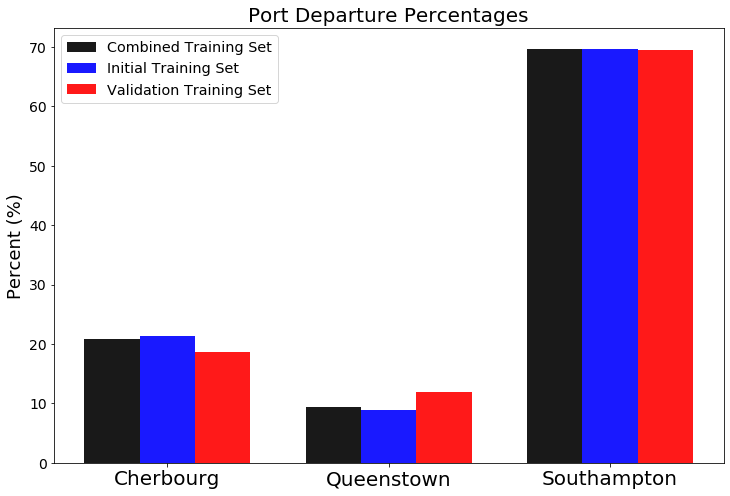

In [14]:
graph_1x = ('Cherbourg', 'Queenstown', 'Southampton')
width = 0.25
ind = np.arange(3)
graph_y_training = ((sum(data_training['Embarked'] == 'C') / len(data_training))*100, (sum(data_training['Embarked'] == 'Q') / len(data_training))*100, (sum(data_training['Embarked'] == 'S') / len(data_training))*100)
graph_y_train = ((sum(data_train['Embarked'] == 'C') / len(data_train))*100, (sum(data_train['Embarked'] == 'Q') / len(data_train))*100, (sum(data_train['Embarked'] == 'S') / len(data_train))*100)
graph_y_validate = ((sum(data_validate['Embarked'] == 'C') / len(data_validate))*100, (sum(data_validate['Embarked'] == 'Q') / len(data_validate))*100, (sum(data_validate['Embarked'] == 'S') / len(data_validate))*100)
plt.figure(figsize=(12,8))
plt.bar(ind, graph_y_training, width, color = 'k', alpha = 0.9, label = 'Combined Training Set')
plt.bar(ind + width, graph_y_train, width, color = 'b', alpha = 0.9, label = 'Initial Training Set')
plt.bar(ind + 2*width, graph_y_validate, width, color = 'r', alpha = 0.9, label = 'Validation Training Set')
plt.xticks(ind + width, ('Cherbourg', 'Queenstown', 'Southampton'))
plt.xticks(size = 20)
plt.yticks(size = 14)
plt.ylabel('Percent (%)', size = 18)
plt.title('Port Departure Percentages', size = 20)
plt.legend(fontsize = 'x-large')
plt.savefig('Train_Embark_Percentage_Comparison.pdf')
plt.plot()

[]

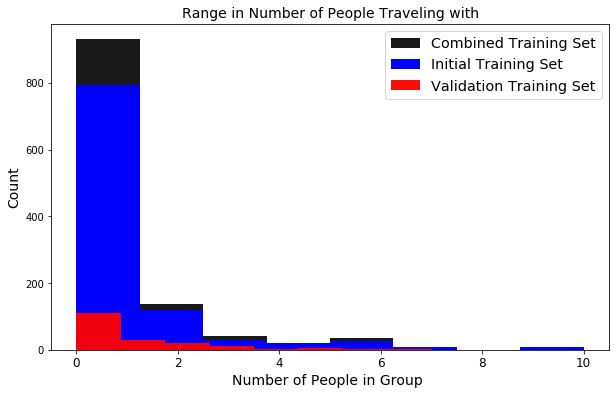

In [15]:
plt.figure(figsize=(10,6))
plt.hist(data_training['SibSp'] + data_training['Parch'], color = 'k', alpha = 0.9, label = 'Combined Training Set', bins = 8)
plt.hist(data_train['SibSp'] + data_train['Parch'], color = 'b', label = 'Initial Training Set', bins = 8)
plt.hist(data_validate['SibSp'] + data_validate['Parch'], color = 'r', alpha = 0.95, label = 'Validation Training Set', bins = 8)
plt.legend(fontsize = 'x-large')
plt.xlabel('Number of People in Group ', size = 14)
plt.ylabel('Count', size = 14)
plt.title('Range in Number of People Traveling with', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 10)
plt.savefig('Train_Group_Size_Range.pdf')
plt.plot()

644
79
565
12.267080745341614


/Users/melendez526/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/melendez526/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


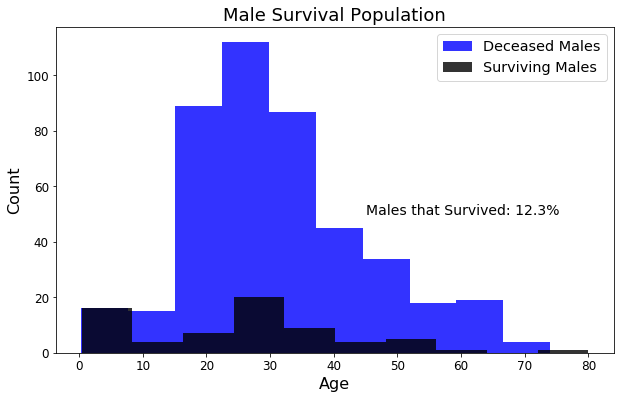

In [16]:
males = data_train[(data_train[['Sex']].values == ['male']).all(1)]
print(len(males))
males_survive = males[(males[['Survived']].values == [1]).all(1)]
males_deceased = males[(males[['Survived']].values == [0]).all(1)]
print(len(males_survive))
print(len(males_deceased))

percent_males_survived = (len(males_survive) / len(males)) * 100
print(percent_males_survived)

plt.figure(figsize=(10,6))
plt.hist(males_deceased['Age'], color = 'b', alpha = 0.8, label = 'Deceased Males')
plt.hist(males_survive['Age'], color = 'k', alpha = 0.8, label = 'Surviving Males')
plt.text(45, 50, "Males that Survived: {:.3}%".format(percent_males_survived), fontsize = 14)
plt.legend(fontsize = 'x-large')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Male Survival Population', fontsize = 18)
plt.savefig('Male_Survival_Population.pdf')
plt.show()

357
298
59
83.4733893557423


/Users/melendez526/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/melendez526/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


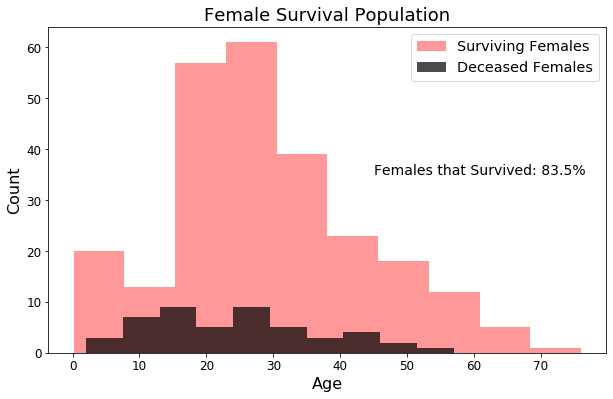

In [17]:
females = data_train[(data_train[['Sex']].values == ['female']).all(1)]
print(len(females))
females_survive = females[(females[['Survived']].values == [1]).all(1)]
females_deceased = females[(females[['Survived']].values == [0]).all(1)]
print(len(females_survive))
print(len(females_deceased))

percent_females_survived = (len(females_survive) / len(females)) * 100
print(percent_females_survived)

plt.figure(figsize=(10,6))
plt.hist(females_survive['Age'], color = 'r', alpha = 0.4, label = 'Surviving Females')
plt.hist(females_deceased['Age'], color = 'k', alpha = 0.7, label = 'Deceased Females')
plt.text(45, 35, "Females that Survived: {:.3}%".format(percent_females_survived), fontsize = 14)
plt.legend(fontsize = 'x-large')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Female Survival Population', fontsize = 18)
plt.savefig('Female_Survival_Population.pdf')
plt.show()

377
624
37.66233766233766


/Users/melendez526/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/melendez526/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


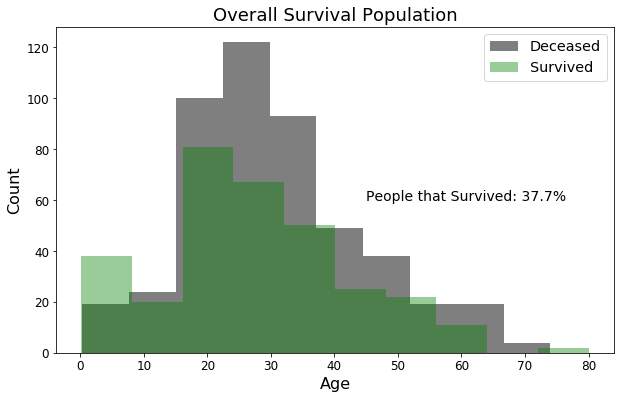

In [18]:
alive = data_train[(data_train[['Survived']].values == [1]).all(1)]
dead = data_train[(data_train[['Survived']].values == [0]).all(1)]
print(len(alive))
print(len(dead))

percent_alive = (len(alive) / len(data_train)) * 100
print(percent_alive)

plt.figure(figsize=(10,6))
plt.hist(dead['Age'], color = 'k', alpha = 0.5, label = 'Deceased')
plt.hist(alive['Age'], color = 'g', alpha = 0.4, label = 'Survived')
plt.text(45, 60, "People that Survived: {:.3}%".format(percent_alive), fontsize = 14)
plt.legend(fontsize = 'x-large')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Overall Survival Population', fontsize = 18)
plt.savefig('Overall_Survival_Population.pdf')
plt.show()

In [19]:
port_c = data_train[(data_train[['Embarked']].values == ['C']).all(1)]
port_c_alive = port_c[(port_c[['Survived']].values == [1]).all(1)]
port_c_1 = port_c[(port_c[['Pclass']].values == [1]).all(1)]
port_c_2 = port_c[(port_c[['Pclass']].values == [2]).all(1)]
port_c_3 = port_c[(port_c[['Pclass']].values == [3]).all(1)]

port_q = data_train[(data_train[['Embarked']].values == ['Q']).all(1)]
port_q_alive = port_q[(port_q[['Survived']].values == [1]).all(1)]
port_q_1 = port_q[(port_q[['Pclass']].values == [1]).all(1)]
port_q_2 = port_q[(port_q[['Pclass']].values == [2]).all(1)]
port_q_3 = port_q[(port_q[['Pclass']].values == [3]).all(1)]

port_s = data_train[(data_train[['Embarked']].values == ['S']).all(1)]
port_s_alive = port_s[(port_s[['Survived']].values == [1]).all(1)]
port_s_1 = port_s[(port_s[['Pclass']].values == [1]).all(1)]
port_s_2 = port_s[(port_s[['Pclass']].values == [2]).all(1)]
port_s_3 = port_s[(port_s[['Pclass']].values == [3]).all(1)]

# print(len(port_c))
# print(len(port_c_alive))
# print(len(port_q))
# print(len(port_q_alive))
# print(len(port_s))
# print(len(port_s_alive))

percent_c_alive = (len(port_c_alive) / len(port_c)) * 100
percent_c_1 = (len(port_c_1) / len(port_c)) * 100
percent_c_2 = (len(port_c_2) / len(port_c)) * 100
percent_c_3 = (len(port_c_3) / len(port_c)) * 100

percent_q_alive = (len(port_q_alive) / len(port_q)) * 100
percent_q_1 = (len(port_q_1) / len(port_q)) * 100
percent_q_2 = (len(port_q_2) / len(port_q)) * 100
percent_q_3 = (len(port_q_3) / len(port_q)) * 100

percent_s_alive = (len(port_s_alive) / len(port_s)) * 100
percent_s_1 = (len(port_s_1) / len(port_s)) * 100
percent_s_2 = (len(port_s_2) / len(port_s)) * 100
percent_s_3 = (len(port_s_3) / len(port_s)) * 100

print('Percent of People from Port C that survived: {:.4}%'.format(percent_c_alive))
print('    {:.4}% of people from Class 1, {:.4}% of people from Class 2, {:.4}% of people from Class 3'.
     format(percent_c_1, percent_c_2, percent_c_3))
print('Percent of People from Port Q that survived: {:.4}%'.format(percent_q_alive))
print('    {:.4}% of people from Class 1, {:.4}% of people from Class 2, {:.4}% of people from Class 3'.
     format(percent_q_1, percent_q_2, percent_q_3))
print('Percent of People from Port S that survived: {:.4}%'.format(percent_s_alive))
print('    {:.4}% of people from Class 1, {:.4}% of people from Class 2, {:.4}% of people from Class 3'.
     format(percent_s_1, percent_s_2, percent_s_3))

Percent of People from Port C that survived: 50.7%
    52.58% of people from Class 1, 12.21% of people from Class 2, 35.21% of people from Class 3
Percent of People from Port Q that survived: 46.07%
    3.371% of people from Class 1, 4.494% of people from Class 2, 92.13% of people from Class 3
Percent of People from Port S that survived: 32.52%
    19.2% of people from Class 1, 25.21% of people from Class 2, 55.59% of people from Class 3


In [20]:
class1 = data_train[(data_train[['Pclass']].values == [1]).all(1)]
class1_alive = class1[(class1[['Survived']].values == [1]).all(1)]
class2 = data_train[(data_train[['Pclass']].values == [2]).all(1)]
class2_alive = class2[(class2[['Survived']].values == [1]).all(1)]
class3 = data_train[(data_train[['Pclass']].values == [3]).all(1)]
class3_alive = class3[(class3[['Survived']].values == [1]).all(1)]

percent_class1_alive = (len(class1_alive) / len(class1)) * 100
percent_class2_alive = (len(class2_alive) / len(class2)) * 100
percent_class3_alive = (len(class3_alive) / len(class3)) * 100


print('Percent of People from Class 1 that survived: {:.4}%'.format(percent_class1_alive))
print('Percent of People from Class 2 that survived: {:.4}%'.format(percent_class2_alive))
print('Percent of People from Class 3 that survived: {:.4}%'.format(percent_class3_alive))

print(percent_class1_alive)

Percent of People from Class 1 that survived: 58.0%
Percent of People from Class 2 that survived: 39.81%
Percent of People from Class 3 that survived: 27.52%
57.99999999999999


[]

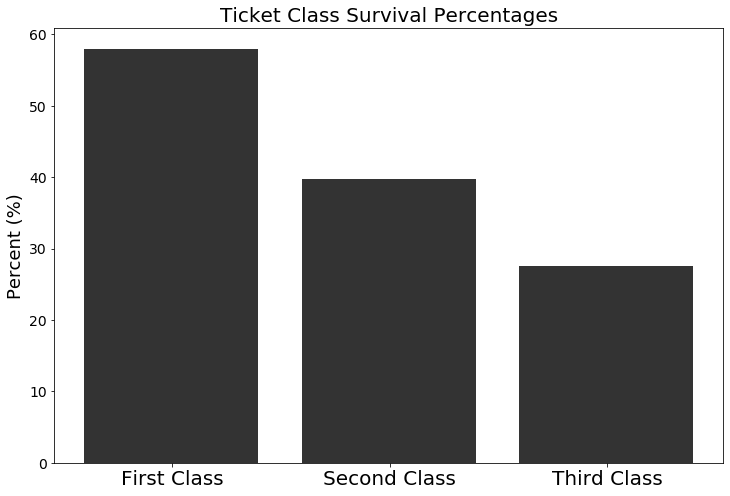

In [21]:
graph_1x = ('First Class', 'Second Class', 'Third Class')
width = 0.25
ind = np.arange(3)
graph1y = (percent_class1_alive, percent_class2_alive, percent_class3_alive)
plt.figure(figsize=(12,8))
plt.bar(ind, graph1y, color = 'k', alpha = 0.8, label = 'Combined Training Set')
plt.xticks(ind + width/50, ('First Class', 'Second Class', 'Third Class'))
plt.xticks(size = 20)
plt.yticks(size = 14)
plt.ylabel('Percent (%)', size = 18)
plt.title('Ticket Class Survival Percentages', size = 20)
plt.savefig('Ticket_Class_Survival_Percentage.pdf')
plt.plot()

377
624


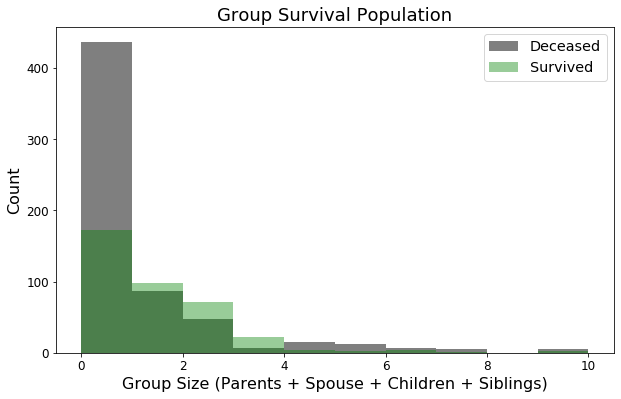

In [22]:
alive = data_train[(data_train[['Survived']].values == [1]).all(1)]
dead = data_train[(data_train[['Survived']].values == [0]).all(1)]
print(len(alive))
print(len(dead))

plt.figure(figsize=(10,6))
plt.hist(dead['SibSp'] + dead['Parch'], color = 'k', alpha = 0.5, label = 'Deceased')
plt.hist(alive['SibSp'] + alive['Parch'], color = 'g', alpha = 0.4, label = 'Survived')
plt.legend(fontsize = 'x-large')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Group Size (Parents + Spouse + Children + Siblings)', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Group Survival Population', fontsize = 18)
plt.savefig('Group_Survival_Population.pdf')
plt.show()

377
624


/Users/melendez526/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/melendez526/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


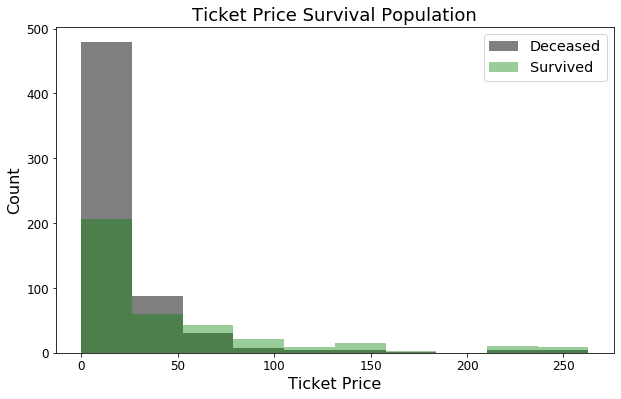

In [23]:
alive = data_train[(data_train[['Survived']].values == [1]).all(1)]
dead = data_train[(data_train[['Survived']].values == [0]).all(1)]
print(len(alive))
print(len(dead))

plt.figure(figsize=(10,6))
plt.hist(dead['Fare'], color = 'k', alpha = 0.5, label = 'Deceased')
plt.hist(alive['Fare'], color = 'g', alpha = 0.4, label = 'Survived')
plt.legend(fontsize = 'x-large')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Ticket Price', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Ticket Price Survival Population', fontsize = 18)
plt.savefig('Fare_Survival_Population.pdf')
plt.show()

### Think I'm done with plots...

## Feature Engineering below 

In [25]:
#Fill in missing values for the training set, separately (train and validate) and as a whole (training)
#Then do the same for the test set
#Getting it ready for the model: fill in missing data, combine SibSp and ParCh columns, delete unncessary columns

#########################
###### Train Data #######
#########################

#Calculate values for missing data
Median_age_train = data_train['Age'].median(skipna = True)
Median_fare_train = data_train['Fare'].median(skipna = True)
Most_likely_embarked_train = data_train['Embarked'].value_counts().idxmax()
print('Train data is {} long'.format(len(data_train)))
print('The Median Age for data_train is {:.4}'.format(Median_age_train))
print('The Median Fare for data_train is {:.4}'.format(Median_fare_train))
print('The Most Likely Embarked Location for data_train is {}'.format(str(Most_likely_embarked_train)))

#Filling in empty spaces with data
data_train['Age'].fillna(Median_age_train, inplace = True)
data_train['Fare'].fillna(Median_fare_train, inplace = True)
data_train["Embarked"].fillna(Most_likely_embarked_train, inplace = True)
#Adding in a new column that has the group size (how many spouse + children + parents + siblings they're with)
#Families will most likely have a higher chance of surviving, but not if too large
data_train['GroupSize'] = data_train['SibSp'] + data_train['Parch']
#Now drop both of the columns
data_train.drop('SibSp', axis = 1, inplace = True)
data_train.drop('Parch', axis = 1, inplace = True)
#Deleting other columns that won't affect the model. The survival doesn't depend on these 
data_train.drop('Cabin', axis = 1, inplace = True)
data_train.drop('Ticket', axis = 1, inplace = True)
data_train.drop('Name', axis = 1, inplace = True)
data_train.drop('PassengerId', axis = 1, inplace = True)

#Hot Encoding columns with distinct values
data_train = pd.get_dummies(data_train, columns=['Pclass', 'Sex', 'Embarked'])
#Remember that 0 means no and 1 means yes

#Normalize the age, fare, and Group Size column: [0,1]
data_train = data_train / data_train.max(axis=0)
#Can just normalize the whole table and not specifically those columns because every other column 
#has a 0 or 1 everywhere so those values will stay the same

print('\n')

#########################
#### Validation Data ####
#########################

Median_age_validate = data_validate['Age'].median(skipna = True)
Median_fare_validate = data_validate['Fare'].median(skipna = True)
Most_likely_embarked_validate = data_validate['Embarked'].value_counts().idxmax()
print('Validate data is {} long'.format(len(data_validate)))
print('The Median Age for data_validate is {:.4}'.format(Median_age_validate))
print('The Median Fare for data_validate is {:.4}'.format(Median_fare_validate))
print('The Most Likely Embarked Location for data_validate is {}'.format(str(Most_likely_embarked_validate)))

data_validate['Age'].fillna(Median_age_validate, inplace = True)
data_validate['Fare'].fillna(Median_fare_validate, inplace = True)
data_validate["Embarked"].fillna(Most_likely_embarked_validate, inplace = True)
data_validate['GroupSize'] = data_validate['SibSp'] + data_validate['Parch']
data_validate.drop('SibSp', axis = 1, inplace = True)
data_validate.drop('Parch', axis = 1, inplace = True)
data_validate.drop('Cabin', axis = 1, inplace = True)
data_validate.drop('Ticket', axis = 1, inplace = True)
data_validate.drop('Name', axis = 1, inplace = True)
data_validate.drop('PassengerId', axis = 1, inplace = True)

data_validate = pd.get_dummies(data_validate, columns=['Pclass', 'Sex', 'Embarked'])

data_validate = data_validate / data_validate.max(axis=0)

print('\n')
      
#########################
##### Training Data #####
#########################

Median_age_training = data_training['Age'].median(skipna = True)
Median_fare_training = data_training['Fare'].median(skipna = True)
Most_likely_embarked_training = data_training['Embarked'].value_counts().idxmax()
print('Training data (train + validate) is {} long'.format(len(data_training)))
print('The Median Age for data_training is {:.4}'.format(Median_age_training))
print('The Median Fare for data_training is {:.4}'.format(Median_fare_training))
print('The Most Likely Embarked Location for data_training is {}'.format(str(Most_likely_embarked_training)))

data_training['Age'].fillna(Median_age_training, inplace = True)
data_training['Fare'].fillna(Median_fare_training, inplace = True)
data_training["Embarked"].fillna(Most_likely_embarked_training, inplace = True)
data_training['GroupSize'] = data_training['SibSp'] + data_training['Parch']
data_training.drop('SibSp', axis = 1, inplace = True)
data_training.drop('Parch', axis = 1, inplace = True)
data_training.drop('Cabin', axis = 1, inplace = True)
data_training.drop('Ticket', axis = 1, inplace = True)
data_training.drop('Name', axis = 1, inplace = True)
data_training.drop('PassengerId', axis = 1, inplace = True)

data_training = pd.get_dummies(data_training, columns=['Pclass', 'Sex', 'Embarked'])

data_training = data_training / data_training.max(axis=0)

print('\n')

#########################
###### Test Data #######
#########################

Median_age_test = data_test['Age'].median(skipna = True)
Median_fare_test = data_test['Fare'].median(skipna = True)
Most_likely_embarked_test = data_test['Embarked'].value_counts().idxmax()
print('Test data is {} long'.format(len(data_test)))
print('The Median Age for data_test is {:.4}'.format(Median_age_test))
print('The Median Fare for data_test is {:.4}'.format(Median_fare_test))
print('The Most Likely Embarked Location for data_test is {}'.format(str(Most_likely_embarked_test)))

data_test['Age'].fillna(Median_age_test, inplace = True)
data_test['Fare'].fillna(Median_fare_test, inplace = True)
data_test["Embarked"].fillna(Most_likely_embarked_test, inplace = True)
data_test['GroupSize'] = data_test['SibSp'] + data_test['Parch']
data_test.drop('SibSp', axis = 1, inplace = True)
data_test.drop('Parch', axis = 1, inplace = True)
data_test.drop('Cabin', axis = 1, inplace = True)
data_test.drop('Ticket', axis = 1, inplace = True)
data_test.drop('Name', axis = 1, inplace = True)
data_test.drop('PassengerId', axis = 1, inplace = True)

data_test = pd.get_dummies(data_test, columns=['Pclass', 'Sex', 'Embarked'])

data_test = data_test / data_test.max(axis=0)

print('\n')

Train data is 1001 long
The Median Age for data_train is 28.0
The Median Fare for data_train is 14.45
The Most Likely Embarked Location for data_train is S


Validate data is 177 long
The Median Age for data_validate is 29.0
The Median Fare for data_validate is 14.4
The Most Likely Embarked Location for data_validate is S


Training data (train + validate) is 1178 long
The Median Age for data_training is 28.0
The Median Fare for data_training is 14.45
The Most Likely Embarked Location for data_training is S


Test data is 131 long
The Median Age for data_test is 30.0
The Median Fare for data_test is 15.0
The Most Likely Embarked Location for data_test is S




/Users/melendez526/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/melendez526/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/melendez526/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/

In [26]:
data_train

,Survived,Age,Fare,GroupSize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
987,1.0,0.95000,0.299810,0.1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1108,0.0,0.71250,0.626870,0.2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
122,0.0,0.40625,0.114338,0.1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
733,0.0,0.28750,0.049430,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
219,0.0,0.37500,0.039924,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
956,1.0,0.35000,0.079848,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
165,1.0,0.11250,0.078042,0.2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
378,0.0,0.25000,0.015257,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
807,0.0,0.22500,0.029563,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [27]:
#Making Survived column a completely different matrix (for each data set), that will be our y values
survive_train = np.array(data_train['Survived'], ndmin = 2).T
print('survive_train shape = ', survive_train.shape)
print('survive_train type = ', type(survive_train))

survive_validate = np.array(data_validate['Survived'], ndmin = 2).T
print('survive_validate shape = ', survive_validate.shape)
print('survive_validate type = ', type(survive_validate))

survive_training = np.array(data_training['Survived'], ndmin = 2).T
print('survive_training shape = ', survive_training.shape)
print('survive_training type = ', type(survive_training))

survive_test = np.array(data_test['Survived'], ndmin = 2).T
print('survive_test shape = ', survive_test.shape)
print('survive_test type = ', type(survive_test))

print('\n')

#Deleting Survived columns from the data matrices, since they're now their own matrix and we don't want them in our x
#Then converting them to numpy array's because that's what our model expects
data_train.drop('Survived', axis = 1, inplace = True)
data_train = data_train.to_numpy()
print('data_train shape = ', data_train.shape)
print('data_train type = ', type(data_train))

data_validate.drop('Survived', axis = 1, inplace = True)
data_validate = data_validate.to_numpy()
print('data_train shape = ', data_validate.shape)
print('data_train type = ', type(data_validate))

data_training.drop('Survived', axis = 1, inplace = True)
data_training = data_training.to_numpy()
print('data_training shape = ', data_training.shape)
print('data_training type = ', type(data_training))

data_test.drop('Survived', axis = 1, inplace = True)
#print(data_test)
data_test = data_test.to_numpy()
print('data_train shape = ', data_test.shape)
print('data_train type = ', type(data_test))

survive_train shape =  (1001, 1)
survive_train type =  <class 'numpy.ndarray'>
survive_validate shape =  (177, 1)
survive_validate type =  <class 'numpy.ndarray'>
survive_training shape =  (1178, 1)
survive_training type =  <class 'numpy.ndarray'>
survive_test shape =  (131, 1)
survive_test type =  <class 'numpy.ndarray'>


data_train shape =  (1001, 11)
data_train type =  <class 'numpy.ndarray'>
data_train shape =  (177, 11)
data_train type =  <class 'numpy.ndarray'>
data_training shape =  (1178, 11)
data_training type =  <class 'numpy.ndarray'>
data_train shape =  (131, 11)
data_train type =  <class 'numpy.ndarray'>


## Time to test our models

In [29]:
#First, train model on data_train and survive_train
#Then run Predict on the data_validate
#Lastly, run ROC on survive_validate
#See if it's good

reload(regression)

<module 'regression' from '/Users/melendez526/EnhanceIT/Classroom/Assignments/Titanic/regression.py'>

In [30]:
model = regression.Binary_Logistic_Regression(num_iter = 10000, alpha = 0, beta = 0.3)

In [31]:
model.Fit(data_train, survive_train)

array([[-2.31772311],
       [ 0.12794678],
       [-0.85016827],
       [ 1.06260621],
       [-0.01112222],
       [-1.0065767 ],
       [ 2.81184895],
       [-0.98104394],
       [ 0.27257506],
       [ 0.51233959],
       [-0.07926843]])

In [32]:
y_hat_train = model.Predict(data_validate)

/Users/melendez526/EnhanceIT/Classroom/Assignments/Titanic/regression.py:42: RuntimeWarning: invalid value encountered in long_scalars
  return tp / (tp + fp)


Best F1 Score:         0.784 at 0.535
Best Accuracy Score:   0.853 at 0.749
Area under the curve : 0.848


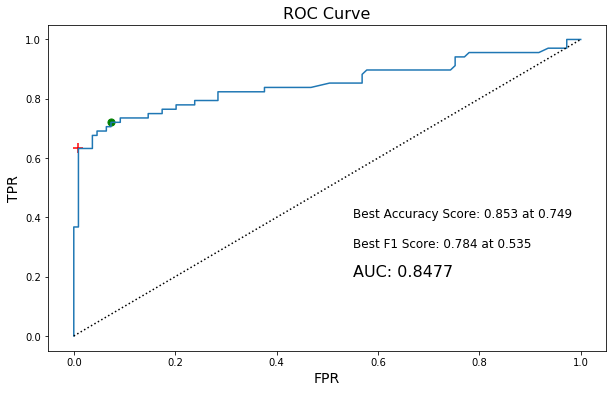

In [33]:
reload(regression)
regression.ROC(survive_validate, y_hat_train, num = 10000)
plt.savefig('Train_Validate_ROC.pdf')

In [34]:
regression.R2(survive_validate, y_hat_train)

0.4550369225795362

## Creating a new model with slightly different data (combined) 

In [35]:
#Then used the data_training and survive_training to train the model
#Then run predict on the data_test
#Next, run ROC on survive_test
#Hope it's good

reload(regression)

<module 'regression' from '/Users/melendez526/EnhanceIT/Classroom/Assignments/Titanic/regression.py'>

In [36]:
model = regression.Binary_Logistic_Regression(num_iter = 10000, alpha = 0, beta = 0.3)

In [37]:
model.Fit(data_training, survive_training)

array([[-2.12018607],
       [ 0.31484729],
       [-1.17382784],
       [ 0.94677324],
       [ 0.007176  ],
       [-0.96690091],
       [ 2.76396345],
       [-0.99101739],
       [ 0.24923449],
       [ 0.42344854],
       [-0.02489577]])

In [38]:
y_hat_training = model.Predict(data_test)

/Users/melendez526/EnhanceIT/Classroom/Assignments/Titanic/regression.py:42: RuntimeWarning: invalid value encountered in long_scalars
  return tp / (tp + fp)


Best F1 Score:         0.792 at 0.334
Best Accuracy Score:   0.855 at 0.758
Area under the curve : 0.882


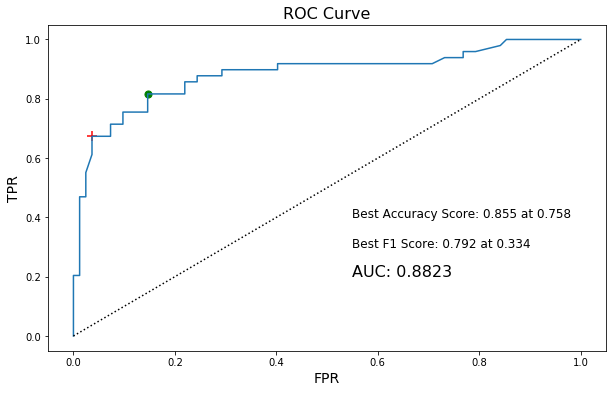

In [39]:
reload(regression)
regression.ROC(survive_test, y_hat_training, num = 10000)
plt.savefig('Training_Test_ROC.pdf')

In [40]:
regression.R2(survive_test, y_hat_training)

0.4752156834597905